In [1]:
# Bank Marketing - Decision Tree Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:

# 1. Load the data
df = pd.read_csv('bank-additional-full.csv', sep=';')

In [3]:
# 2. Basic Overview
print(df.shape)
print(df['y'].value_counts(normalize=True))

(41188, 21)
y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64


In [6]:
df.drop(columns=['duration'], inplace=True, errors='ignore')


In [7]:
# 4. Encode target
df['y'] = df['y'].map({'no': 0, 'yes': 1})

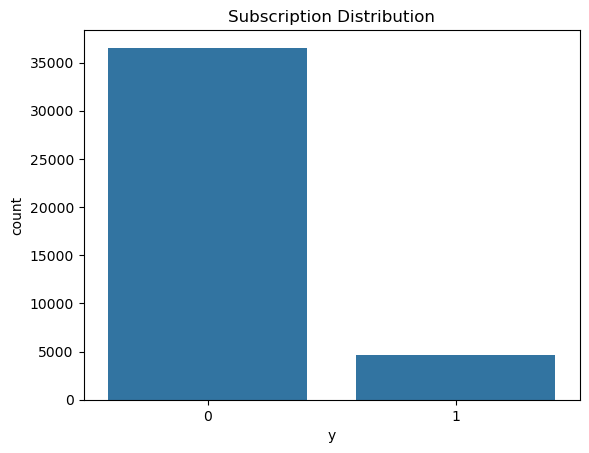

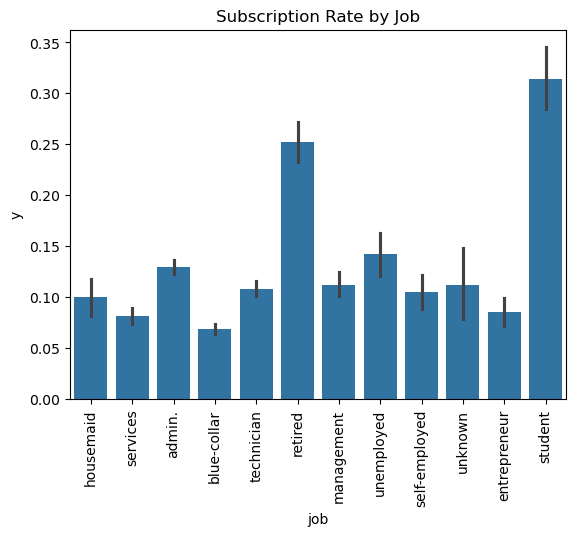

In [8]:
# 5. Exploratory Data Analysis
sns.countplot(x='y', data=df)
plt.title('Subscription Distribution')
plt.show()

sns.barplot(x='job', y='y', data=df, estimator=np.mean)
plt.xticks(rotation=90)
plt.title('Subscription Rate by Job')
plt.show()

In [9]:
# 6. Feature Selection
features = df.drop(columns=['y'])
target = df['y']

In [10]:
# Identify categorical and numeric
categorical = features.select_dtypes(include=['object']).columns.tolist()
numeric = features.select_dtypes(include=['number']).columns.tolist()

In [11]:
# 7. Build a pipeline
numeric_transformer = 'passthrough'
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric),
        ('cat', categorical_transformer, categorical)
    ])

clf = Pipeline(steps=[
    ('preproc', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
])

In [12]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42, stratify=target)

In [13]:
# 9. Train model
clf.fit(X_train, y_train)

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['age', 'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=5, random_state=42))])

Accuracy: 0.9025248846807478
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7310
           1       0.69      0.25      0.37       928

    accuracy                           0.90      8238
   macro avg       0.80      0.62      0.66      8238
weighted avg       0.89      0.90      0.88      8238



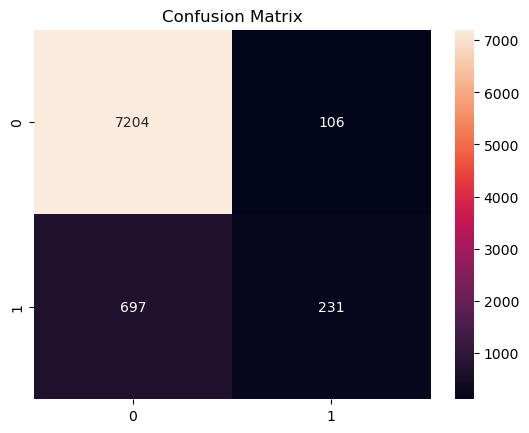

In [14]:
# 10. Evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

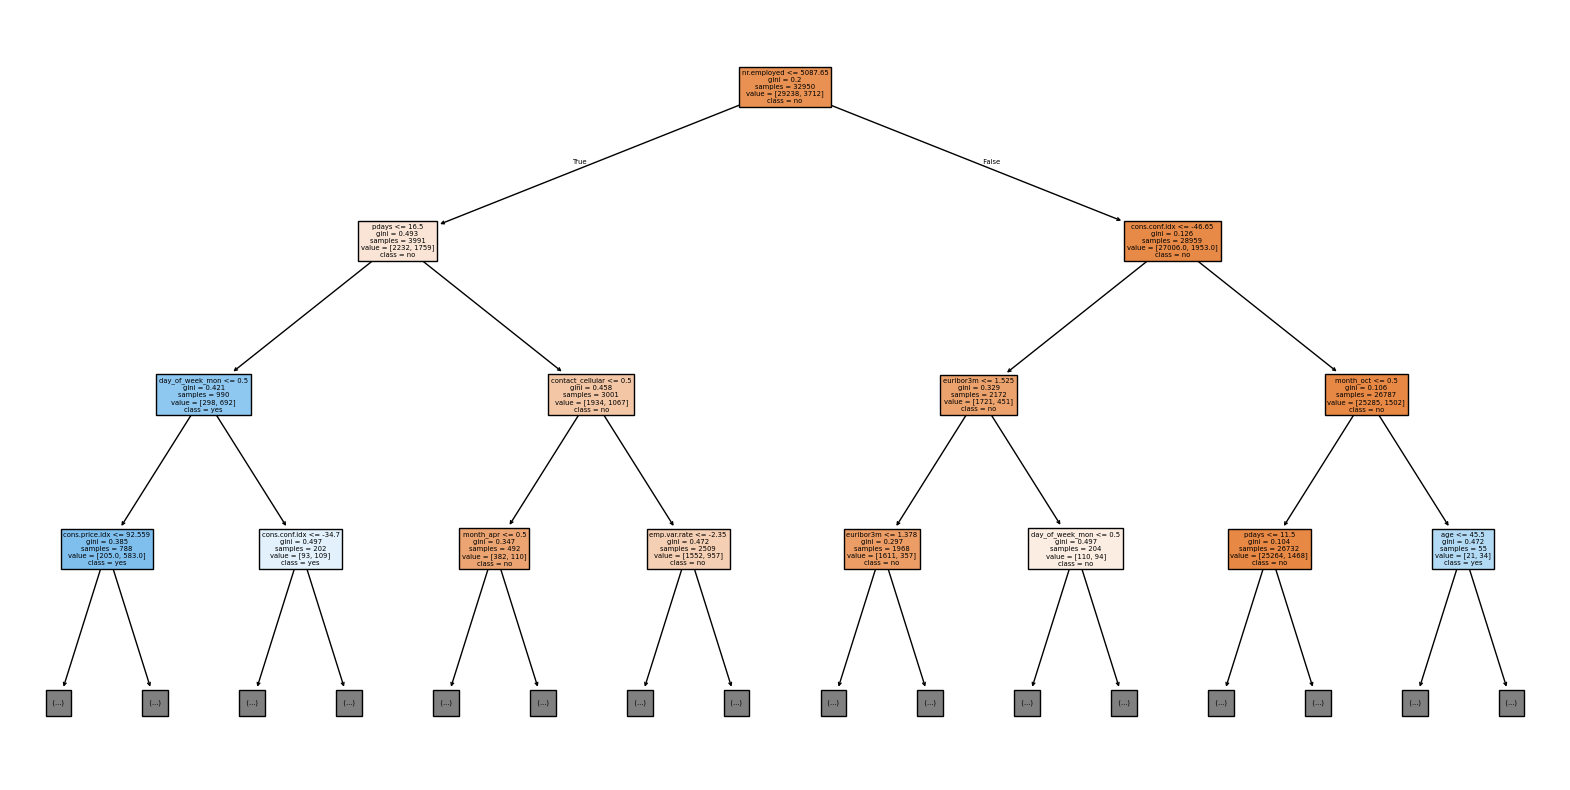

In [15]:
# 11. Visualize Tree
plt.figure(figsize=(20,10))
plot_tree(clf.named_steps['classifier'], feature_names=(numeric + list(clf.named_steps['preproc'].named_transformers_['cat'].get_feature_names_out(categorical))),
          class_names=['no', 'yes'], filled=True, max_depth=3)
plt.show()
